#  서울특별시 코로나 바이러스 크롤링 데이터

# 1. 전처리

크롤링한 데이터를 pandas 를 통해서 불러온다.

In [419]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns


In [420]:
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'


In [421]:
corona_data = pd.read_csv('C:\study\workspace_python\pdsample\datasets\mydata\corona_df_2021_08_14.csv', encoding = 'utf-8')

In [422]:
corona_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40400 entries, 0 to 40399
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      40400 non-null  int64 
 1   환자      40400 non-null  int64 
 2   확진일     40400 non-null  object
 3   거주지     40400 non-null  object
 4   여행력     40400 non-null  object
 5   접촉력     40400 non-null  object
 6   퇴원현황    31778 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.2+ MB


## 1.1 Null 값 처리

msno를 통해서 null 값의 개수를 확인한다.  
퇴원현황 칼럼이 31778 개로 나머지 칼럼과 비교했을 때 null 값이 있음을 확인할 수 있다.

<AxesSubplot:>

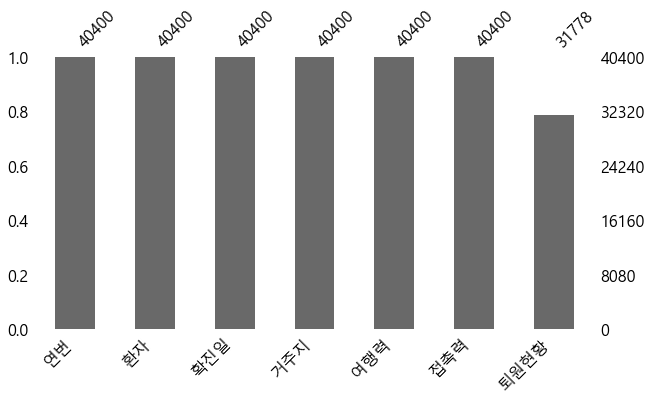

In [423]:
import missingno as msno

msno.bar(corona_data, figsize = (10,5))

<AxesSubplot:>

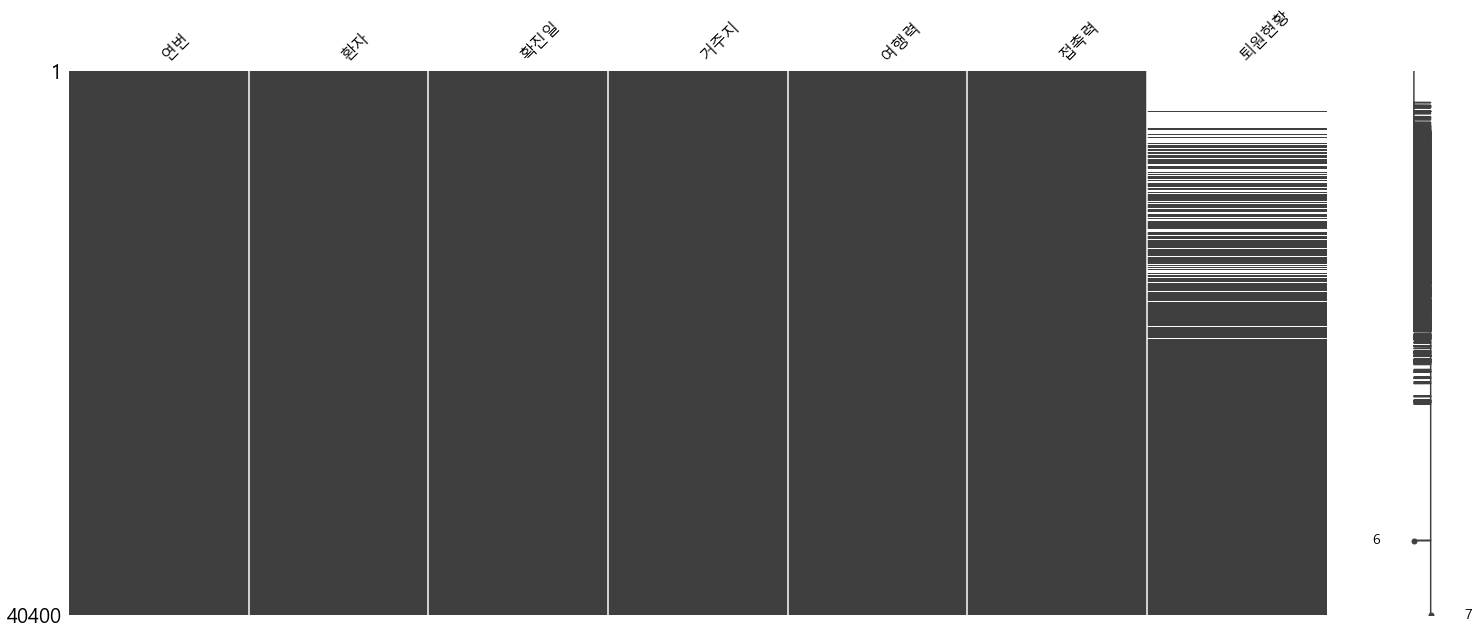

In [424]:
msno.matrix(corona_data)

### 1.1.1 퇴원현황 column

- 퇴원현황만 null 값 있는 거 확인.

In [425]:
counted_null = corona_data['퇴원현황'].isnull().sum()
print('코로나 크롤링 데이터 퇴원현황 null 개수 : ', counted_null)

코로나 크롤링 데이터 퇴원현황 null 개수 :  8622


In [426]:
# https://www.seoul.go.kr/coronaV/coronaStatus.do 
# 사이트를 확인해보니 퇴원하기 전 퇴원현황을 Null 값으로 처리했다는 것을 유추가능.
# null 을 '퇴원전' 으로 수정


corona_data['퇴원현황'].unique()

array([nan, '퇴원', '사망'], dtype=object)

In [427]:
corona_data['퇴원현황'] = corona_data['퇴원현황'].fillna('퇴원전')


<AxesSubplot:>

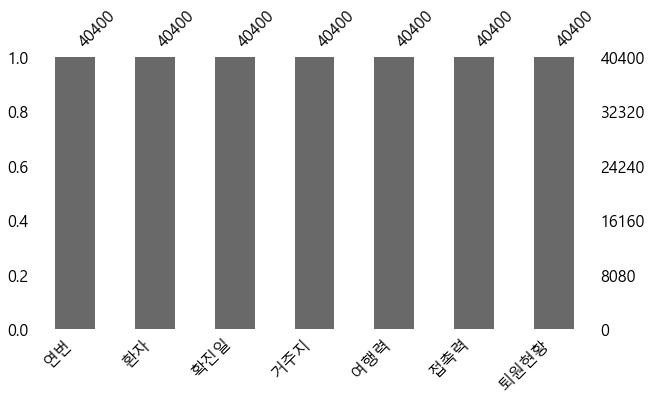

In [428]:
msno.bar(corona_data, figsize = (10,5))

### 1.1.2 여행력 column

null 값은 없지만, null 값으로 의심되는 데이터를 발견

In [429]:
corona_data['여행력'].unique()

array(['-', '미국', '독일', '폴란드', '아랍에미레이트', '카자흐스탄', '기타 확진자 접촉', '인도네시아',
       '스리랑카', '중국', '네덜란드', '인도', '러시아', '터키', '파라과이', '우즈베키스탄', '가나',
       '~8.8', '일본', '영국', '몽골', '체코', '아랍에미리트', '우크라이나', '모잠비크',
       '키르키스스탄', '베트남', '태국', '몰타', '캐나다', '키르기스스탄', '미얀마', '이라크', '프랑스',
       '모스크바', '방글라데시', '파키스탄', '네날', '네팔', '러시아(두바이경유)', '필리핀',
       '아프리카 말라위', ' ', '말레이시아', '자카르타', '멕시코', '케냐', '쿠웨이트', 'UAE',
       '캄보디아', '스웨덴', '아랍에메리드(두바이)', '미국 괌', '으즈베키스탄', '인도네시아  ', '말레이지아',
       '인도네시아 자카르타', '스페인마드리드', '타지키스탄', '키르키스탄', '도미니카공화국', '인도네시아 ',
       '아프카니스탄', '시에라리온', '마포행복나눔마켓', '  ', '핀란드', '키르기스탄', '콜롬비아', '덴마크',
       '인도 ', '싱가폴', '브라질', '오만', '아프가니스탄', '아일랜드', '이스라엘', '아랍에미리트연합',
       '남아프리카공화국', '잠비아(아디스아바바)', '미국 ', '이집트', '짐바브웨', '이집트(카타르)',
       '방글라데시,아랍에미리트', '21.5.13', '사우디아라비아', '마케도니아', '중국(시안)', '이란',
       '헝가리', '파푸아뉴기니(포트모르즈비)', '파푸아뉴기니', '페루', '21.4.7', '강릉', '불가리아',
       '수단', '스위스', '중국(장춘)', '필리핀 ', '카타르', '인도 델리', '멕시코(미국경유)',
       '오스트

In [430]:
#"-" 를 여행력 없음으로 간주, 보기 쉽게 바꿀 예정

counted_null2 = len(corona_data[corona_data['여행력'] == '-'])
print('여행력 column null 값 개수 : ', counted_null2)
corona_data[corona_data['여행력'] == '-'].sample(5)

여행력 column null 값 개수 :  39848


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
24022,46848,148798,2021-06-15,송파구,-,타시도 확진자 접촉,퇴원
5245,65625,203440,2021-08-03,성북구,-,기타 확진자 접촉,퇴원전
40135,30735,98548,2021-03-20,동작구,-,기타 확진자 접촉,퇴원
38385,32485,104546,2021-04-02,강남구,-,강남구 가족 관련,퇴원
38873,31997,103084,2021-03-30,마포구,-,기타 확진자 접촉,퇴원


In [431]:
corona_data['여행력'].replace('-','없음', inplace = True)

In [432]:
corona_data.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,70870,222111,2021-08-13,기타,없음,감염경로 조사중,퇴원전
1,70869,221232,2021-08-13,기타,없음,감염경로 조사중,퇴원전
2,70868,221356,2021-08-13,성북구,없음,감염경로 조사중,퇴원전
3,70867,221710,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전
4,70866,220502,2021-08-13,타시도,없음,기타 확진자 접촉,퇴원전


## 1.2. Feature Engineering

시각화를 하기 편하게 변수들을 가공한다.

### 1.2.1 칼럼 삭제

In [15]:
corona_data.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,70870,222111,2021-08-13,기타,없음,감염경로 조사중,퇴원전
1,70869,221232,2021-08-13,기타,없음,감염경로 조사중,퇴원전
2,70868,221356,2021-08-13,성북구,없음,감염경로 조사중,퇴원전
3,70867,221710,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전
4,70866,220502,2021-08-13,타시도,없음,기타 확진자 접촉,퇴원전


In [434]:
#연번은 의미없는 칼럼으로 보여서 삭제

corona_data.drop(['연번'], axis = 1,inplace = True)

### 1.2.2 칼럼 생성

확진일을 연도, 월, 일로 나누기

In [435]:
corona_data['연도'] = corona_data['확진일'].str.split('-', expand = True)[0]
corona_data['월'] = corona_data['확진일'].str.split('-', expand = True)[1]
corona_data['일'] = corona_data['확진일'].str.split('-', expand = True)[2]


In [436]:
#자료형 변경

corona_data['월'] = corona_data['월'].astype(int)
corona_data['일'] = corona_data['일'].astype(int)

In [437]:
corona_data.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일
0,222111,2021-08-13,기타,없음,감염경로 조사중,퇴원전,2021,8,13
1,221232,2021-08-13,기타,없음,감염경로 조사중,퇴원전,2021,8,13
2,221356,2021-08-13,성북구,없음,감염경로 조사중,퇴원전,2021,8,13
3,221710,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전,2021,8,13
4,220502,2021-08-13,타시도,없음,기타 확진자 접촉,퇴원전,2021,8,13


# 2. 데이터 분석 and 시각화

## 2.1 코로나 확진자가 거주하는 지역 지도 표시하기

### 2.1.1 거주지별 환자수 대략 파악

In [438]:
#데이터 다시 확인

corona_data.head(10)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일
0,222111,2021-08-13,기타,없음,감염경로 조사중,퇴원전,2021,8,13
1,221232,2021-08-13,기타,없음,감염경로 조사중,퇴원전,2021,8,13
2,221356,2021-08-13,성북구,없음,감염경로 조사중,퇴원전,2021,8,13
3,221710,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전,2021,8,13
4,220502,2021-08-13,타시도,없음,기타 확진자 접촉,퇴원전,2021,8,13
5,220262,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전,2021,8,13
6,221253,2021-08-13,타시도,없음,기타 확진자 접촉,퇴원전,2021,8,13
7,221252,2021-08-13,타시도,없음,감염경로 조사중,퇴원전,2021,8,13
8,220223,2021-08-13,광진구,없음,감염경로 조사중,퇴원전,2021,8,13
9,221555,2021-08-13,영등포구,없음,기타 확진자 접촉,퇴원전,2021,8,13


<AxesSubplot:>

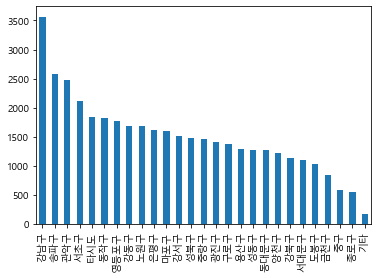

In [439]:
#어떤 지역에 확진자들이 많이 거주하는지 파악하기
corona_data['거주지'].value_counts().plot(kind = 'bar')

In [440]:
#거주지별 환자수를 data frame 으로 받아오기
residence_counts = corona_data['거주지'].value_counts()
residence_counts.reset_index()
residence_counts_df = residence_counts.reset_index().rename(columns = {"거주지" : "거주 환자수","index": "거주지"})


<AxesSubplot:title={'center':'거주지별 환자수'}, xlabel='거주지', ylabel='거주 환자수'>

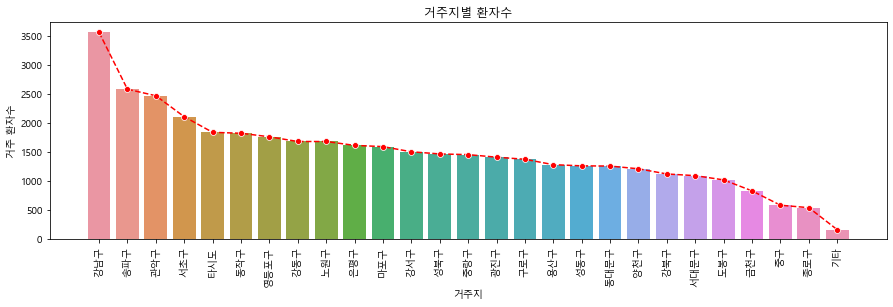

In [441]:
#거주지별 환자수 막대 그래프를 보완해서 그리기
plt.figure(figsize = (15,4))
plt.title('거주지별 환자수')
plt.xticks(rotation = 90)
sns.barplot(data = residence_counts_df, x = '거주지', y = '거주 환자수')
sns.lineplot(data = residence_counts_df, x = '거주지', y = '거주 환자수', marker = 'o', linestyle = '--', color = 'red')

### 2.1.2 거주지별 위도 경도 데이터 가져오기

거주지별 좌표 정보를 얻기위해서 크롤링 작업 실행  
네이버 map 을 사용  


In [442]:
#기타 항목은 크롤링 과정에서 읽혀와지지 않기 때문에 기타를 포함한 행 전체 삭제

corona_data[corona_data['거주지'] == '기타'].index.tolist()
for_graph_df = corona_data.drop(corona_data[corona_data['거주지'] == '기타'].index.tolist())

In [443]:
#타시도 또한 지도에 표시되지 않기 때문에 타시도를 포함한 행 전체 삭제

for_graph_df.drop(for_graph_df[for_graph_df['거주지'] == '타시도'].index.tolist(), inplace = True)

In [444]:
from urllib.request import urlopen
from urllib import parse
from urllib.request import Request
from urllib.error import HTTPError
from bs4 import BeautifulSoup
import json

In [445]:
residence_list = for_graph_df['거주지'].unique().tolist()


In [446]:
#좌표 만들기

#naver api
client_id = 'wxj67k3geg'
client_pw = 'vDFxfMNt1ToZdXJQyKeNDARNd9L0bedUMgKctuPf'

api_url = 'https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query='

#주소 목록 파일
geo_coordi = []


#특정 url 의 정보를 받고 그 정보를 json 으로 받아서 정보를 읽어오기

for residence in residence_list:
    add_urlenc = parse.quote(residence) #코로나 주소를 url 에 사용가능하도록 url encoding
    url = api_url + add_urlenc #api 주소의 query 변수에 들어갈 encoding 된 주소
    request = Request(url) #url 정보 request 로 받아오기
    request.add_header('X-NCP-APIGW-API-KEY-ID', client_id)
    request.add_header('X-NCP-APIGW-API-KEY', client_pw)
    response = urlopen(request)
    
    response_body = response.read().decode('utf-8')
    response_body_json = json.loads(response_body)

    latitude = response_body_json['addresses'][0]['y']
    longitude = response_body_json['addresses'][0]['x']
    
    geo_coordi.append([latitude, longitude])
    


In [447]:
resi_sr = pd.Series(geo_coordi)
resi_df = resi_sr.reset_index()
resi_df['index'] = residence_list

In [448]:
resi_df.rename(columns = {'index' : '지역구', 0 : '좌표'}, inplace = True)

In [449]:
resi_df[resi_df['지역구'] == '성북구']['좌표']

0    [37.5894, 127.016749]
Name: 좌표, dtype: object

In [450]:
for_graph_df['좌표'] = 0

for i in range(len(for_graph_df)):
    for j in residence_list:
        if for_graph_df.iloc[i,2] == j:
            for_graph_df.iloc[i,9] = resi_df[resi_df['지역구'] == j]['좌표']
        
        

In [459]:
for_graph_df.sample(10)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,좌표
20481,158293,2021-07-01,마포구,없음,기타 확진자 접촉,퇴원,2021,7,1,"[37.5663245, 126.901491]"
1022,219688,2021-08-12,마포구,없음,감염경로 조사중,퇴원전,2021,8,12,"[37.5663245, 126.901491]"
16228,168702,2021-07-11,성북구,없음,기타 확진자 접촉,퇴원,2021,7,11,"[37.5894, 127.016749]"
17271,165669,2021-07-09,도봉구,없음,성동구 소재 학원 관련,퇴원,2021,7,9,"[37.668768, 127.047163]"
10598,184547,2021-07-22,강동구,없음,타시도 확진자 접촉,퇴원,2021,7,22,"[37.530126, 127.1237708]"
29148,133786,2021-05-19,노원구,없음,기타 확진자 접촉,퇴원,2021,5,19,"[37.654358, 127.056473]"
21740,154837,2021-06-26,강남구,없음,기타 확진자 접촉,퇴원,2021,6,26,"[37.517305, 127.047502]"
1768,214282,2021-08-10,송파구,없음,기타 확진자 접촉,퇴원전,2021,8,10,"[37.5145636, 127.1059186]"
27532,138513,2021-05-27,서대문구,없음,기타 확진자 접촉,퇴원,2021,5,27,"[37.579225, 126.9368]"
14028,174854,2021-07-15,중구,없음,기타 확진자 접촉,퇴원,2021,7,15,"[37.563843, 126.997602]"


In [460]:
#좌표 x, y 값 받기


for_graph_df['y'] = 0
for_graph_df['x'] = 0

In [461]:
for i in range(len(for_graph_df)):
    for_graph_df.iloc[i,10] = for_graph_df.iloc[i,9][0]
    for_graph_df.iloc[i,11] = for_graph_df.iloc[i,9][1]
    

In [47]:
for_graph_df['거주지'].unique()

array(['성북구', '동대문구', '광진구', '영등포구', '관악구', '강동구', '중구', '은평구', '노원구',
       '구로구', '마포구', '용산구', '종로구', '강남구', '서초구', '서대문구', '도봉구', '동작구',
       '양천구', '송파구', '금천구', '강북구', '강서구', '중랑구', '성동구'], dtype=object)

In [50]:
for_graph_df.sample(10)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,좌표,y,x
4513,205150,2021-08-04,서초구,없음,경기 수원시 전자회사 관련,퇴원전,2021,8,4,"[37.483569, 127.032598]",37.483569,127.032598
22261,153508,2021-06-24,마포구,없음,감염경로 조사중,퇴원,2021,6,24,"[37.5663245, 126.901491]",37.5663245,126.901491
2722,211434,2021-08-08,구로구,없음,구로구 소재 고시원 관련,퇴원전,2021,8,8,"[37.495472, 126.887536]",37.495472,126.887536
16927,166088,2021-07-09,강남구,없음,기타 확진자 접촉,퇴원,2021,7,9,"[37.517305, 127.047502]",37.517305,127.047502
33262,121318,2021-04-28,성북구,없음,감염경로 조사중,퇴원,2021,4,28,"[37.5894, 127.016749]",37.5894,127.016749
34215,118090,2021-04-23,성동구,없음,기타 확진자 접촉,퇴원,2021,4,23,"[37.563456, 127.036821]",37.563456,127.036821
4511,205156,2021-08-04,중구,없음,기타 확진자 접촉,퇴원전,2021,8,4,"[37.563843, 126.997602]",37.563843,126.997602
34514,117275,2021-04-22,영등포구,없음,감염경로 조사중,퇴원,2021,4,22,"[37.526436, 126.896004]",37.526436,126.896004
37130,108625,2021-04-09,강남구,없음,타시도 확진자 접촉,퇴원,2021,4,9,"[37.517305, 127.047502]",37.517305,127.047502
17648,164373,2021-07-08,동대문구,없음,감염경로 조사중,퇴원,2021,7,8,"[37.574524, 127.03965]",37.574524,127.03965


In [51]:
for_graph_df['x'].astype(float)
for_graph_df['y'].astype(float)

2        37.589400
3        37.574524
5        37.574524
8        37.538617
9        37.526436
           ...    
40395    37.654358
40396    37.517305
40397    37.530126
40398    37.514564
40399    37.563456
Name: y, Length: 38390, dtype: float64

# 본래 이렇게 해야하는데 너무 오래걸리고 오류

In [60]:
#실제로 데이터 다 받아오기


#naver api
client_id = 'wxj67k3geg'
client_pw = 'vDFxfMNt1ToZdXJQyKeNDARNd9L0bedUMgKctuPf'

api_url = 'https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query='

#주소 목록 파일
geo_coordi = []

for add in for_graph_df['거주지']:
    add_urlenc = parse.quote(add) #코로나 주소를 url 에 사용가능하도록 url encoding
    url = api_url + add_urlenc #api 주소의 query 변수에 들어갈 encoding 된 주소
    
    request = Request(url) #url 정보 request 로 받아오기
    request.add_header('X-NCP-APIGW-API-KEY-ID', client_id)
    request.add_header('X-NCP-APIGW-API-KEY', client_pw)
    
    try:
        response = urlopen(request)
        
    except HTTPError as e:
        print('HTTP ERROR HAVE OCCURED!')
        latitude = None
        longitude = None
    
    else:
        rescode = response.getcode() #정상이면 200 return
        
        if rescode == 200: #만일 정상적으로 가동된다면
            response_body = response.read().decode('utf-8') #request로 받아온 url 정보를 response 다시 연걸 읽는다.
            response_body = json.loads(response_body) #읽은걸 json 파일로 변환
            
            if 'addresses' in response_body:
#                 print(add)
#                 print(response_body['addresses'])
                latitude = response_body['addresses'][0]['y']
                longitude = response_body['addresses'][0]['x']
                print('Process Completely')
                
            else:
                print("""'result' not exist!""")
                latitude = None
                longitude = None
        else:
            print('Respose error code : {}'.format(rescode))
            latitude = None
            longitude = None
    
    
    geo_coordi.append([latitude, longitude])

np_geo_coordi = np.array(geo_coordi)
                
            
    

Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Completely
Process Comp

KeyboardInterrupt: 

### 2.1.3 folium 위한 최종 csv 저장

In [55]:
for_graph_df.to_csv("for_folium_data_corona.csv")

In [228]:
folium_df = pd.read_csv('for_folium_data_corona.csv')

In [229]:
folium_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [230]:
folium_df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,좌표,y,x
0,221356,2021-08-13,성북구,없음,감염경로 조사중,퇴원전,2021,8,13,"['37.5894', '127.016749']",37.589400,127.016749
1,221710,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전,2021,8,13,"['37.574524', '127.03965']",37.574524,127.039650
2,220262,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전,2021,8,13,"['37.574524', '127.03965']",37.574524,127.039650
3,220223,2021-08-13,광진구,없음,감염경로 조사중,퇴원전,2021,8,13,"['37.538617', '127.082375']",37.538617,127.082375
4,221555,2021-08-13,영등포구,없음,기타 확진자 접촉,퇴원전,2021,8,13,"['37.526436', '126.896004']",37.526436,126.896004


### 2.1.4 코로나 확진자 수 지도에 시각화

In [211]:
resi_series = folium_df['거주지'].value_counts().reset_index()
resi_df = resi_series.rename(columns = {'거주지':'환자수', 'index':'거주지'})

In [61]:
!pip install folium

In [213]:
import folium

In [214]:
m = folium.Map([37.589400, 127.016749], tiles="Cartodb Positron", zoom_start=6)

In [215]:
m

In [231]:
#서울시 중심부의 위도, 걍도

center = [37.541, 126.986]

#맵이 center 에 위치, zoom 레벨은 11 시작

m = folium.Map(location = center, zoom_start = 11)

In [218]:
m

### 2.1.4.1 코로나 환자수 Choropleth 로 시각화

In [219]:
import json

In [220]:
resi_df.columns = ['거주지','환자수']

In [221]:
geo_json = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

In [222]:
m = folium.Map(location = center, tiles = 'Stamen Terrain')

In [223]:
folium.Choropleth(
    geo_data = geo_json,
    name = 'choropleth',
    data = resi_df,
    columns = ['거주지','환자수'],
    key_on =  'feature.properties.name', #구로 되어있음 (경로임)
    fill_color = 'YlGn',
    fill_opacity = 0.7,
    line_opacity = 0.2,
).add_to(m)

In [224]:
m

### 2.1.4.2 코로나 환자 heat 맵으로 표시

In [225]:
heat_df = folium_df[['y','x']]
heat_data = [[j['y'],j['x']] for i,j in heat_df.iterrows()]

In [232]:
from folium.plugins import HeatMap

HeatMap(heat_data).add_to(m)

In [233]:
m

## 2.2 해외유입 환자 비율에서 어떤 나라가 확진자 수가 많은지 시각화

In [236]:
corona_data.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일
0,222111,2021-08-13,기타,없음,감염경로 조사중,퇴원전,2021,8,13
1,221232,2021-08-13,기타,없음,감염경로 조사중,퇴원전,2021,8,13
2,221356,2021-08-13,성북구,없음,감염경로 조사중,퇴원전,2021,8,13
3,221710,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전,2021,8,13
4,220502,2021-08-13,타시도,없음,기타 확진자 접촉,퇴원전,2021,8,13


In [250]:
travel_df = corona_data[corona_data['여행력'] != '없음']
travel_df2 = travel_df['여행력'].value_counts().reset_index()
travel_df2 = travel_df2.rename(columns = {"index" : "국가명","여행력" : "환자수"})
important_travel_df = travel_df2[travel_df2['환자수'] >= 10]

In [260]:
important_travel_df

,국가명,환자수
0,미국,97
1,인도네시아,50
2,러시아,34
3,우즈베키스탄,25
4,일본,20
5,영국,18
6,터키,17
7,카자흐스탄,16
8,인도,16
9,필리핀,15


<AxesSubplot:xlabel='국가명', ylabel='환자수'>

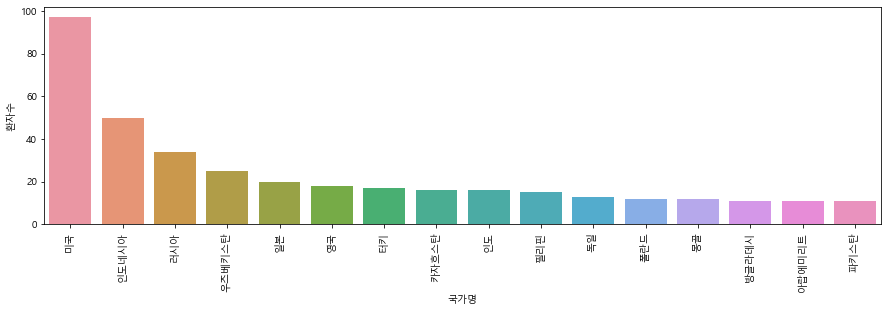

In [261]:
plt.figure(figsize = (15,4))
plt.xticks(rotation = 90)
# plt.text(x = '국가명', y = '환자수', s = 'd')
sns.barplot(data = important_travel_df, x = '국가명', y = '환자수')

## 2.3 날짜별 환자수 선그래프 그리기

### 2.3.1 2021년 월별 환자수 추이

In [290]:
for_graph_df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,좌표,y,x
2,221356,2021-08-13,성북구,없음,감염경로 조사중,퇴원전,2021,8,13,"[37.5894, 127.016749]",37.5894,127.016749
3,221710,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전,2021,8,13,"[37.574524, 127.03965]",37.574524,127.03965
5,220262,2021-08-13,동대문구,없음,감염경로 조사중,퇴원전,2021,8,13,"[37.574524, 127.03965]",37.574524,127.03965
8,220223,2021-08-13,광진구,없음,감염경로 조사중,퇴원전,2021,8,13,"[37.538617, 127.082375]",37.538617,127.082375
9,221555,2021-08-13,영등포구,없음,기타 확진자 접촉,퇴원전,2021,8,13,"[37.526436, 126.896004]",37.526436,126.896004


In [311]:
date_corona_month = for_graph_df['월'].value_counts().reset_index().rename(columns = {"월":"확진자수","index":"월"})

In [341]:
date_corona_month = date_corona_month.sort_values(by = '월')

<AxesSubplot:xlabel='월', ylabel='확진자수'>

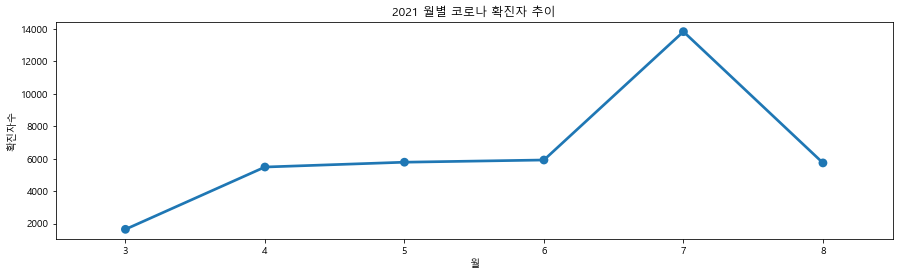

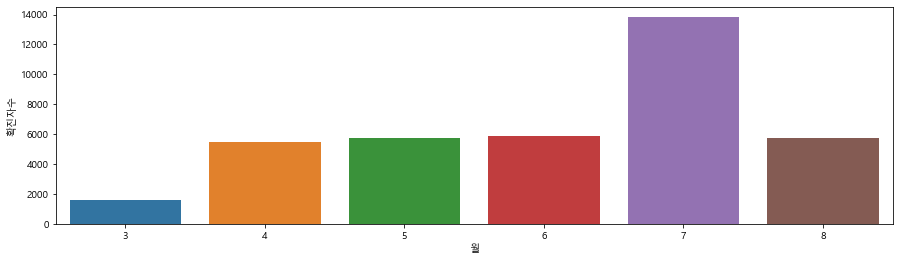

In [344]:
plt.figure(figsize = (15,4))
plt.title('2021 월별 코로나 확진자 추이')
sns.pointplot(data = date_corona_month, x = '월', y = '확진자수')
plt.figure(figsize = (15,4))
sns.barplot(data = date_corona_month, x = '월', y = '확진자수')

### 2.3.2 2021 3월 ~ 8월 확진자 수 추이

In [280]:
date_corona = for_graph_df['확진일'].value_counts().reset_index()
date_corona.rename(columns = {'확진일':'확진자수','index':'확진일'},inplace = True)

In [335]:
date_corona = date_corona.sort_values(by = '확진일')

<AxesSubplot:title={'center':'날짜별 코로나 확진자 수 2 (05_17 ~ 08_13)'}, xlabel='확진일', ylabel='확진자수'>

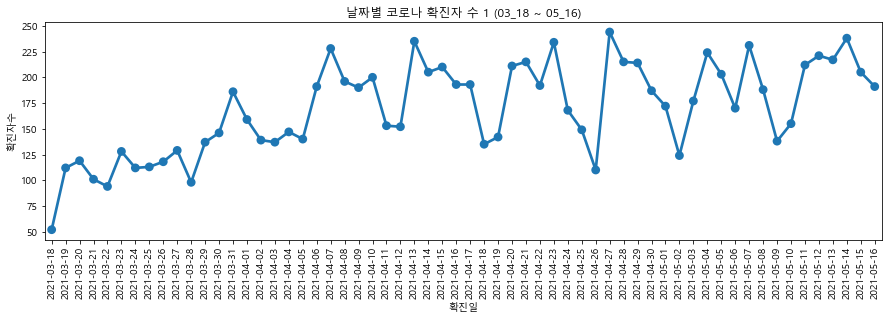

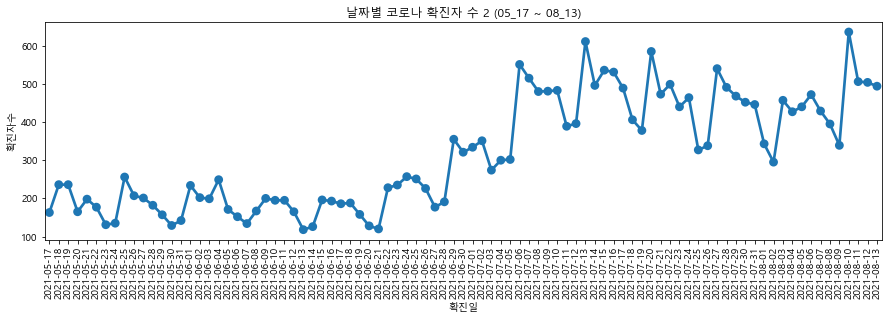

In [398]:

plt.figure(figsize = (15,4))
plt.title('날짜별 코로나 확진자 수 1 (03_18 ~ 05_16)')
plt.xticks(rotation = 90)
sns.pointplot(data = date_corona.iloc[:60,:], x = '확진일', y = '확진자수')
plt.figure(figsize = (15,4))
plt.title('날짜별 코로나 확진자 수 2 (05_17 ~ 08_13)')
plt.xticks(rotation = 90)
sns.pointplot(data = date_corona.iloc[60:,:], x = '확진일', y = '확진자수')




### 2.3.3 날짜별 거주지별 환자수

In [369]:
for_graph_df[(for_graph_df['확진일'] == '2021-03-18') &  (for_graph_df['거주지'] == '강동구')]

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,좌표,y,x
40346,97741,2021-03-18,강동구,없음,수도권 지인모임 관련('21.3.(2)),퇴원,2021,3,18,"[37.530126, 127.1237708]",37.530126,127.1237708
40359,97688,2021-03-18,강동구,없음,감염경로 조사중,퇴원,2021,3,18,"[37.530126, 127.1237708]",37.530126,127.1237708
40360,97690,2021-03-18,강동구,없음,서초구 소재 직장 관련('21.3.),퇴원,2021,3,18,"[37.530126, 127.1237708]",37.530126,127.1237708
40361,97689,2021-03-18,강동구,없음,서초구 소재 직장 관련('21.3.),퇴원,2021,3,18,"[37.530126, 127.1237708]",37.530126,127.1237708
40369,97649,2021-03-18,강동구,없음,병원 및 요양시설,퇴원,2021,3,18,"[37.530126, 127.1237708]",37.530126,127.1237708
40373,97635,2021-03-18,강동구,없음,감염경로 조사중,퇴원,2021,3,18,"[37.530126, 127.1237708]",37.530126,127.1237708
40377,97712,2021-03-18,강동구,없음,기타 확진자 접촉,퇴원,2021,3,18,"[37.530126, 127.1237708]",37.530126,127.1237708
40380,97567,2021-03-18,강동구,없음,감염경로 조사중,퇴원,2021,3,18,"[37.530126, 127.1237708]",37.530126,127.1237708
40384,97568,2021-03-18,강동구,없음,감염경로 조사중,퇴원,2021,3,18,"[37.530126, 127.1237708]",37.530126,127.1237708
40397,97570,2021-03-18,강동구,없음,기타 확진자 접촉,사망,2021,3,18,"[37.530126, 127.1237708]",37.530126,127.1237708


In [396]:
date_resi_gb = for_graph_df.groupby(['확진일','거주지'])[['환자']].count()
date_resi_gb

환자
확진일        거주지    
2021-03-18 강남구   4
           강동구  10
           강북구   5
           강서구   1
           관악구   1
...             ..
2021-08-13 용산구  15
           은평구  23
           종로구  10
           중구   20
           중랑구  18

[3657 rows x 1 columns]

# 코로나 19 여행사업 관련 데이터 

In [401]:
trip_industry_df = pd.read_excel('C:\\study\\workspace_python\\pdsample\\datasets\\mydata\\코로나19 여행관련 데이터.xlsx')

In [402]:
trip_industry_df.T

,0,1,2,3,4,5,6
항목,관광/여행,관광/여행,관광/여행,관광/여행,관광/여행,관광/여행,관광/여행
세부항목,호텔업,여관업,여행사업,항공여객운송업,철도여객운송업,휴양콘도운영업,관광/여행 지수
2021년 06월,89.7,67.7,22.5,23.9,98.8,79.3,50.5
2021년 05월,85.8,67.6,17.4,25.2,102.8,71.5,49.6
2021년 04월,77.1,64.4,17.7,21.3,91.8,60.0,44.5
...,...,...,...,...,...,...,...
2010년 05월,110.6,99.8,95.0,71.2,72.7,105.0,87.5
2010년 04월,102.3,103.1,82.6,66.3,63.9,97.7,81.3
2010년 03월,103.9,104.3,63.6,68.0,62.7,80.0,78.7
2010년 02월,94.5,98.5,67.0,61.1,68.0,109.3,76.3


In [404]:
wanted_data = trip_df.T.iloc[2:20,2]
visualization_df = wanted_data.reset_index()

In [409]:
visualization_df = visualization_df.rename(columns = {2 : 'results', 'index': '날짜'})
visualization_df.head()
visualization_df = visualization_df.sort_values(by = '날짜')
visualization_df

,날짜,results
17,2020년 01월,110
16,2020년 02월,53
15,2020년 03월,25
14,2020년 04월,12
13,2020년 05월,12
12,2020년 06월,14
11,2020년 07월,12
10,2020년 08월,15
9,2020년 09월,12
8,2020년 10월,13


In [410]:
visualization_df['results'] = visualization_df['results'].astype(int)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

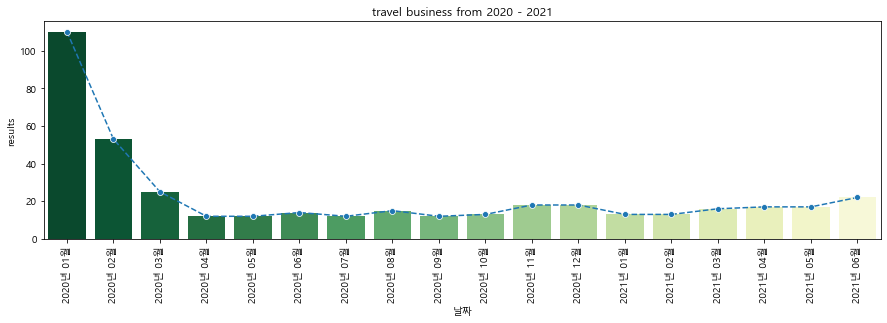

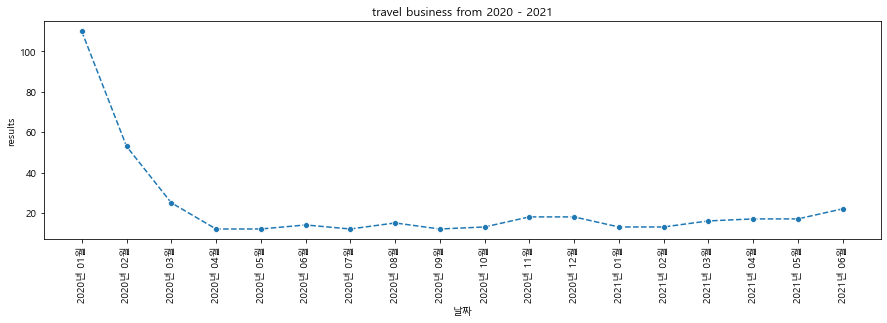

In [413]:
plt.figure(figsize = (15,4))
plt.title('travel business from 2020 - 2021')
sns.lineplot(data = visualization_df, x = '날짜', y = 'results', linestyle = '--', marker = 'o')
sns.barplot(data = visualization_df, x = '날짜', y = 'results', palette='YlGn_r')
plt.xticks(rotation = 90)
plt.figure(figsize = (15,4))
plt.title('travel business from 2020 - 2021')
sns.lineplot(data = visualization_df, x = '날짜', y = 'results', linestyle = '--', marker = 'o')
plt.xticks(rotation = 90)


# plt.savefig('foryongju')